# Make a quick fit using astropy.modeling

## Authors
Rocio Kiman

## Learning Goals
* Know basic models in Astropy Modeling
* Be able to make a quick fit of your data
* Visualize the fit

## Keywords
Modeling, Fit 

## Summary
In this tutorial, we will become familiar with the models available in `astropy.modeling` and learn how to make a quick fit of our data.

### List of available functions 

* `Gaussian1D`
* `Trapezoid1D`
* `Polynomial1D`
* `Sine1D`
* ...

### List of available fitters

* `LinearLSQFitter()`
* `SLSQPLSQFitter()`
* `LevMarLSQFitter()`
* `SimplexLSQFitter()`

Check http://docs.astropy.org/en/stable/modeling/ for more information

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astroquery.vizier import Vizier
# Make plots display in notebooks
%matplotlib inline 

## 1) Fit a Lineal model

In [2]:
catalog = Vizier.get_catalogs('J/A+A/605/A100')

In [3]:
period = np.array(catalog[0]['Period']) 
log_period = np.log10(period)
k_mag = np.array(catalog[0]['__Ksmag_'])
k_mag_err = np.array(catalog[0]['e__Ksmag_'])

Text(0,0.5,'Ks')

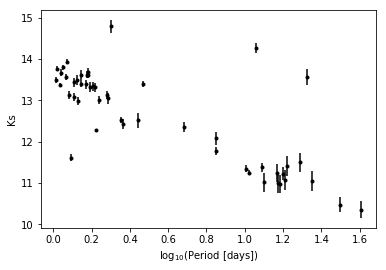

In [4]:
plt.errorbar(log_period,k_mag,k_mag_err,fmt='k.')
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

#### Let's start with the first step: Set up the model

In [5]:
model = models.Polynomial1D(degree=1)

#### Second step: Set up the fitter

In [6]:
fitter = fitting.LinearLSQFitter() 

#### Third step: Fit the data

In [9]:
best_fit = fitter(model, log_period, k_mag, weights = 1.0/k_mag_err)

In [10]:
best_fit

<Polynomial1D(1, c0=13.5175304, c1=-1.83880299)>

Text(0,0.5,'Ks')

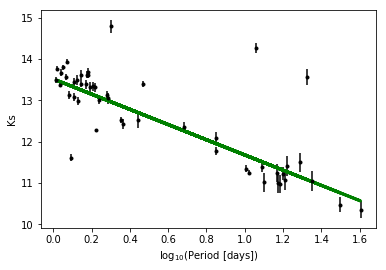

In [12]:
plt.errorbar(log_period,k_mag,k_mag_err,fmt='k.')
plt.plot(log_period, best_fit(log_period), color='g', linewidth=3)  
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')


## Fit a Polynomial model

In [13]:
N = 100
x1 = np.linspace(0, 4, N)  # Makes an array from 0 to 4 of 1000 elements
y1 = x1**3 - 6*x1**2 + 12*x1 - 9 
# Now we add some noise to the data
y1 = np.array([y_point + np.random.normal(0,2) for y_point in y1])  
sigma = 1.5
y1_err = np.ones(N)*sigma 

Let's plot it to see how it looks like:

Text(0,0.5,'$y_1$')

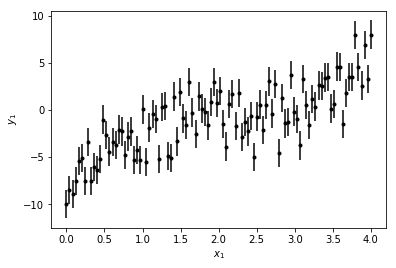

In [14]:
plt.errorbar(x1, y1, yerr=y1_err,fmt='k.')
plt.xlabel('$x_1$')  # Use $$ to write in latex format
plt.ylabel('$y_1$')

In [15]:
model_1 = models.Polynomial1D(degree=3)
fitter_1 = fitting.LinearLSQFitter() 
best_fit_1 = fitter_1(model_1, x1, y1, weights = 1.0/y1_err)

fitter_2 = fitting.SimplexLSQFitter()
best_fit_2 = fitter_2(model_1, x1, y1, weights = 1.0/y1_err)

#### Compare results

In [16]:
print(best_fit_1)
chi_squared = 1.0/(N-4)*sum(((best_fit_1(x1) - y1)/y1_err)**2)
print('chi_squared: {}'.format(chi_squared))

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                 c1                 c2                c3        
    ------------------ ------------------ ----------------- ------------------
    -8.832593654424798 11.183129929518156 -5.23888178355326 0.8409798065420512
chi_squared: 1.9946932462990832


In [17]:
print(best_fit_2)
chi_squared = 1.0/(N-4)*sum(((best_fit_2(x1) - y1)/y1_err)**2)
print('chi_squared: {}'.format(chi_squared))

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
             c0                   c1                  c2                 c3        
    -------------------- ------------------- ------------------- ------------------
    -0.09510087134852271 -0.4508115547053264 -0.6936923100446482 0.2975672361860592
chi_squared: 4.920252297948618


Text(0,0.5,'Ks')

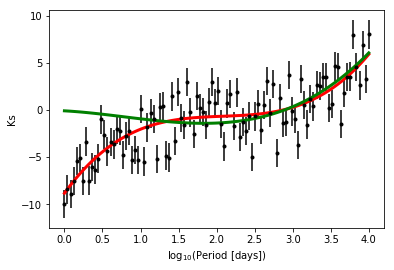

In [18]:
plt.errorbar(x1, y1, yerr=y1_err,fmt='k.')
plt.plot(x1, best_fit_1(x1), color='r', linewidth=3)  
plt.plot(x1, best_fit_2(x1), color='g', linewidth=3)
plt.xlabel(r'$\log_{10}$(Period [days])')
plt.ylabel('Ks')

#### Conclusion: Chose fitter wisely 

## Fit a Gaussian

New data: Gaussian distribution

In [19]:
mu, sigma, amplitude = 0.0, 10.0, 10.0
N = 100
x2 = np.linspace(-30, 30, N)
y2 = amplitude * np.exp(-(x2-mu)**2 / (2*sigma**2))
y2 = np.array([y_point + np.random.normal(0, 1) for y_point in y2])
sigma = 1
y2_err = np.ones(N)*sigma

Text(0,0.5,'$y_2$')

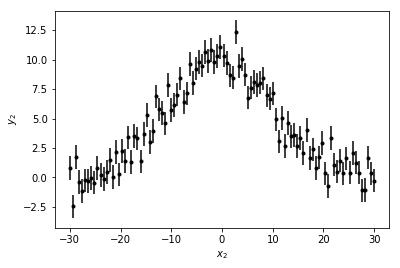

In [20]:
plt.errorbar(x2, y2, yerr=y2_err, fmt='k.')
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')

In [21]:
model_gaussian = models.Gaussian1D()
fitter = fitting.LevMarLSQFitter()
best_fit_1 = fitter(model_gaussian, x2, y2)

In [22]:
import scipy

def f(x,a,b,c):
    return a * np.exp(-(x-b)**2/(2.0*c**2))

In [23]:
popt, pcov = scipy.optimize.curve_fit(f,x2, y2, sigma = y1_err)
a,b,c = popt
best_fit_2 = f(x2,a,b,c)

#### Compare results

In [24]:
print(popt)
chi_squared = 1.0/(N-3)*sum(((best_fit_2 - y2)/y2_err)**2)
print('chi_squared: {}'.format(chi_squared))

[10.20961599 -0.48386548 10.04700995]
chi_squared: 1.1043423977196605


In [25]:
print(best_fit_1)
chi_squared = 1.0/(N-3)*sum(((best_fit_1(x2) - y2)/y2_err)**2)
print('chi_squared: {}'.format(chi_squared))

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev     
    ------------------ ------------------- -----------------
    10.209615669216186 -0.4838660225634147 10.04701057807473
chi_squared: 1.1043423977188325


Text(0,0.5,'$y_2$')

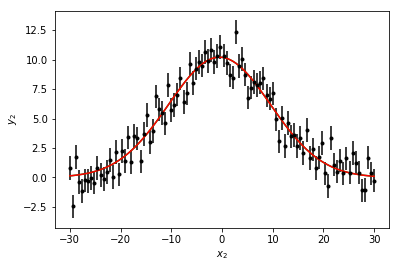

In [26]:
plt.errorbar(x2, y2, yerr=y2_err, fmt='k.')
plt.plot(x2, best_fit_1(x2), 'g-')
plt.plot(x2, best_fit_2, 'r-')
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')

## 3) Exercise

Exercise: For the next data: 
* Choose model and fitter to fit this data.
* Compare different options.

In [13]:
x3 = np.linspace(0, 3, 1000)
y3 = 5.0 * np.sin(2 * np.pi * x3)
y3 = np.array([y_point + np.random.normal(0, 1) for y_point in y3])

Text(0,0.5,'$y_3$')

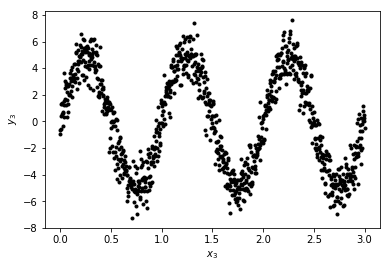

In [14]:
plt.plot(x3, y3, 'k.')
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')